In [1]:
import tensorflow as tf
import numpy

In [2]:
!wget https://github.com/rom1504/minecraft-schematics-dataset/raw/gh-pages/good_small.tfrecord.gz

--2021-01-16 00:30:06--  https://github.com/rom1504/minecraft-schematics-dataset/raw/gh-pages/good_small.tfrecord.gz
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rom1504/minecraft-schematics-dataset/gh-pages/good_small.tfrecord.gz [following]
--2021-01-16 00:30:07--  https://raw.githubusercontent.com/rom1504/minecraft-schematics-dataset/gh-pages/good_small.tfrecord.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6461663 (6.2M) [application/octet-stream]
Saving to: ‘good_small.tfrecord.gz’

good_small.tfrecord 100%[===================>]   6.16M  25.3MB/s    in 0.2s    

2021-01-16 00:30:08 (25.3

In [3]:
# Create a description of the features.
feature_description = {
    'url': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'schematicData': tf.io.FixedLenFeature([], tf.string, default_value=''),
}

def _parse_function(example_proto):
  # Parse the input `tf.train.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)

In [4]:
filenames = ["good_small.tfrecord.gz"]
raw_dataset = tf.data.TFRecordDataset(filenames, compression_type="GZIP")
raw_dataset


<TFRecordDatasetV2 shapes: (), types: tf.string>

In [5]:
for raw_record in raw_dataset.take(10):
  print(len(repr(raw_record)))

261754
259509
261801
261584
261953
261942
260855
262159
261816
261814


In [6]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

<MapDataset shapes: {schematicData: (), url: ()}, types: {schematicData: tf.string, url: tf.string}>

In [11]:
def f(a):
    return numpy.frombuffer(a.numpy(), numpy.int16).reshape([32,32,32])

ds = parsed_dataset.map(lambda x: tf.py_function(f, [x['schematicData']], [tf.int16]))

In [20]:
for a in ds.take(2):
  a

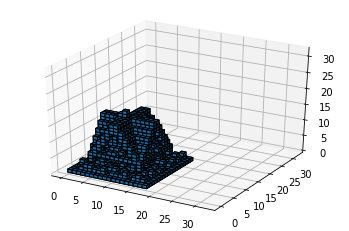

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.voxels(numpy.swapaxes(a[0].numpy(), 1, 2), edgecolor="k")

plt.show()